In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#Reading Data
df = pd.read_csv('updated_pollution_dataset.csv')
df_reset = df.reset_index(drop=True,inplace=True)
X = np.array(df.drop(columns = ['Air Quality']))
Y = np.array(df['Air Quality'])

#checking for null values
df.isnull().any()

#Splitting data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#normalizing data
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [3]:
#building model
model = keras.models.Sequential()

model.add(layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(4,activation = 'softmax'))

model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=['accuracy'])

from sklearn.preprocessing import OneHotEncoder
onecoder = OneHotEncoder()
new_Y_train = onecoder.fit_transform(Y_train.reshape(-1,1)).toarray()
new_Y_test = onecoder.transform(Y_test.reshape(-1,1)).toarray()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
n_epoches = 25
batch_size = 77

history = model.fit(X_train, new_Y_train, epochs = n_epoches, batch_size = batch_size, validation_data = (X_test, new_Y_test))

Epoch 1/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.4555 - loss: 1.2430 - val_accuracy: 0.7450 - val_loss: 0.7527
Epoch 2/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7914 - loss: 0.6608 - val_accuracy: 0.8310 - val_loss: 0.4356
Epoch 3/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8497 - loss: 0.3862 - val_accuracy: 0.8930 - val_loss: 0.3096
Epoch 4/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8980 - loss: 0.2899 - val_accuracy: 0.8970 - val_loss: 0.2572
Epoch 5/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9172 - loss: 0.2392 - val_accuracy: 0.9230 - val_loss: 0.2111
Epoch 6/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9305 - loss: 0.1882 - val_accuracy: 0.9280 - val_loss: 0.1847
Epoch 7/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9295 - loss: 0.1832 - val_accuracy: 0.9350 - val_loss: 0.1662
Epoch 8/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9343 - loss: 0.1635 - val_accuracy: 0.9420 - val_los

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9503 - loss: 0.1293
Loss =  0.12834692001342773
Accuracy =  95.20000219345093 %
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


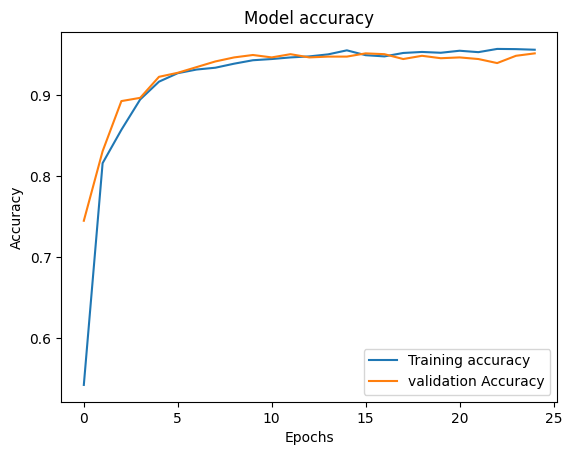

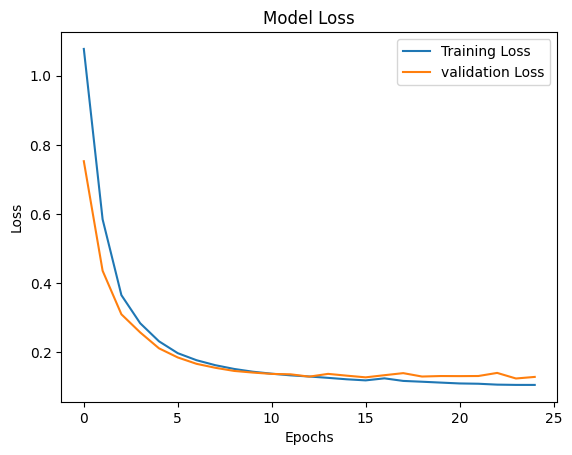

In [5]:
results = model.evaluate(X_test,new_Y_test)



print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")
print(history.history.keys())
# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()